In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [34]:
data = pd.read_csv('cut_campaign1.csv_10000.csv')

Example entries at the beginning

In [35]:
print(data.head())

     year  workforce  dependents  wealth  loyalists_and_radicals  literacy  \
0  1902.5          1           6    16.0                     0.0       0.0   
1  1848.5        849        2746     9.0                  -323.0     121.0   
2  1919.5        500        1375    20.0                   329.0     500.0   
3  1921.5       3000        9001    11.0                   726.0    1452.0   
4  1883.0         64         152    16.0                    17.0       4.0   

   job_satisfaction     profession  is_discriminated  
0         877.32596      "farmers"                 1  
1          99.66377     "laborers"                 1  
2         -70.11796  "bureaucrats"                 0  
3         -64.33100     "laborers"                 0  
4         317.41854     "laborers"                 1  


In [36]:
def hist(pd_data, field_name, x_label='', y_label='', bins=50, x_size=3, y_size=2):
    plt.figure(figsize=(x_size, y_size))
    plt.hist(pd_data[field_name], bins=bins, linewidth=0.2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

Distribution of professions

In [37]:
def profession_plot(pd_data):
    value_counts = pd_data['profession'].value_counts()

    plt.figure(figsize=(20, 15))
    value_counts.plot(kind='bar')
    plt.title('Distribution of professions')
    plt.xlabel('Professions')
    plt.ylabel('Number of profession')
    plt.xticks(rotation=45)
    plt.show()

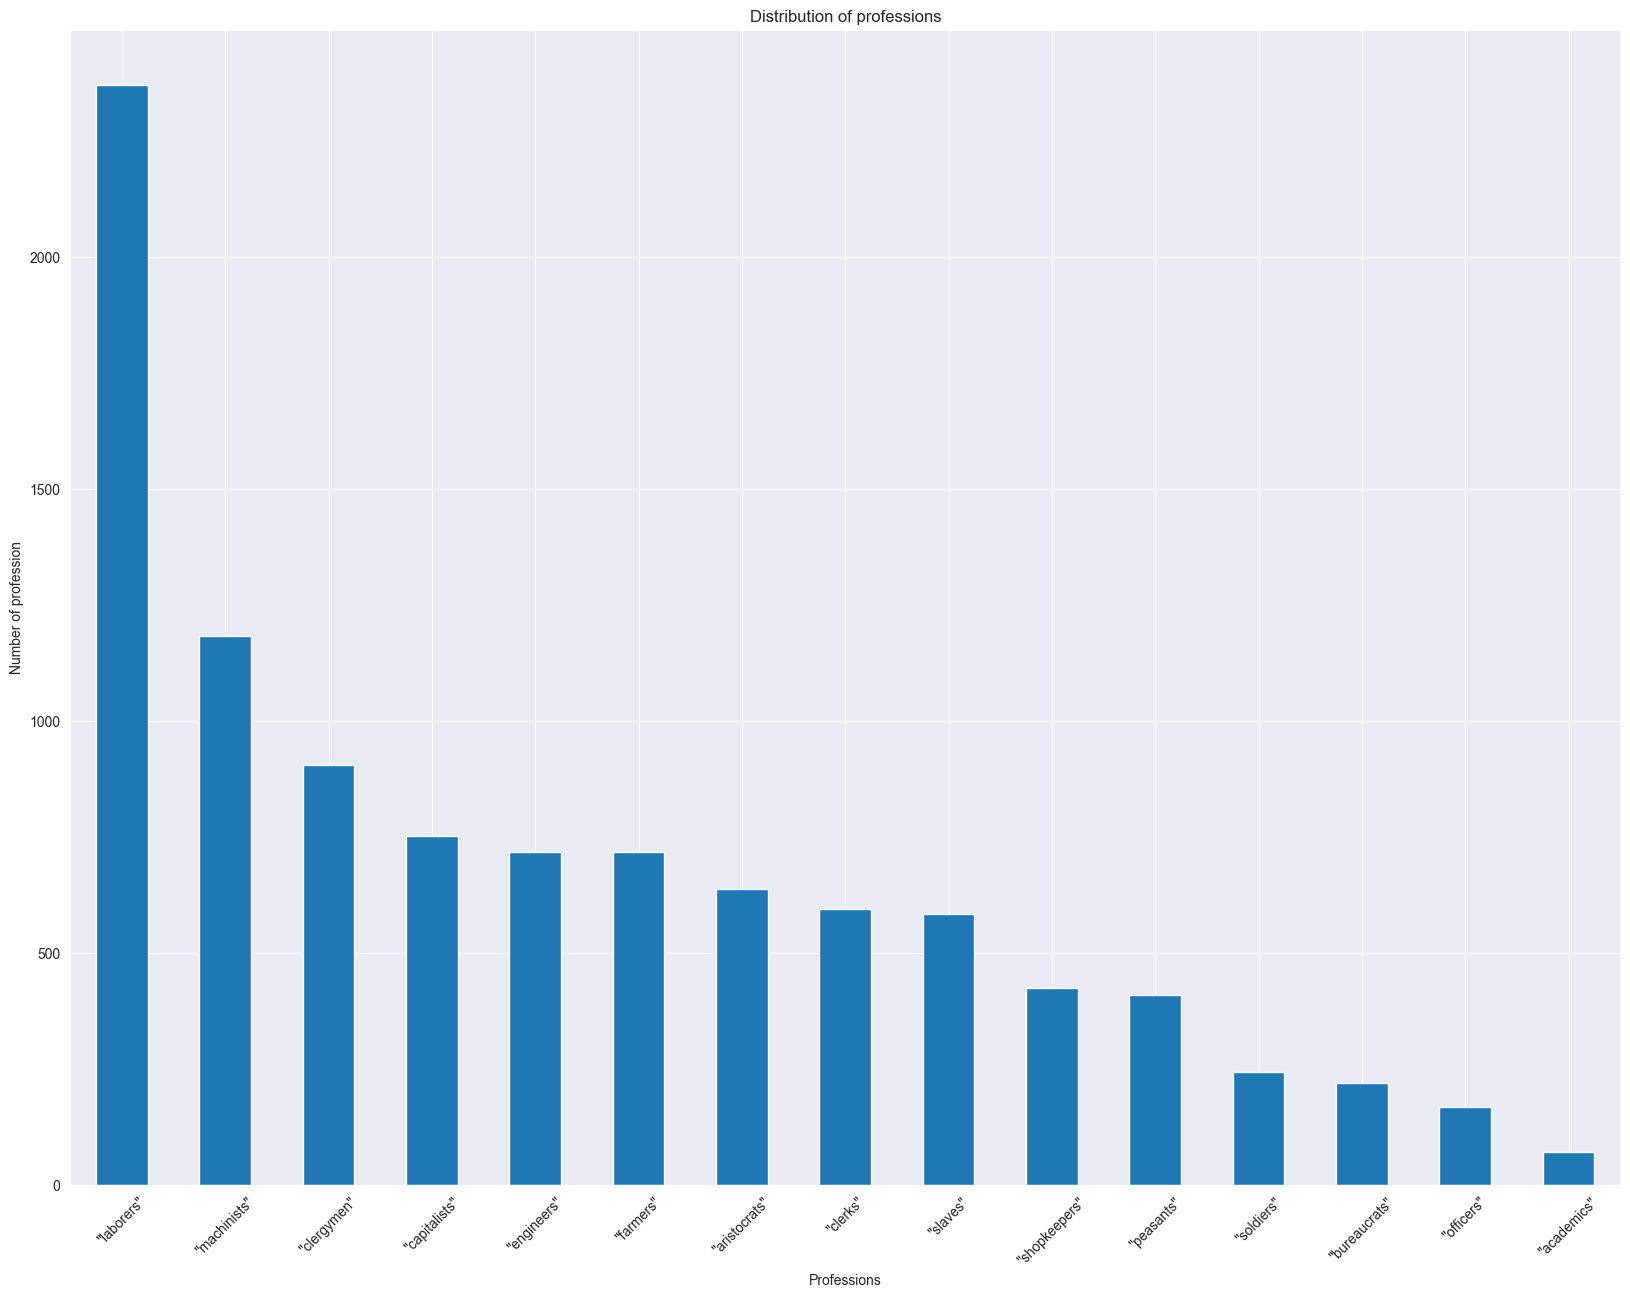

In [38]:
profession_plot(data)

The difference between workforce (providers) and dependents (family members who do not work) is irrelevant, better to replace it with a population

In [39]:
def population(pd_data):
    pd_data['population'] = pd_data['workforce'] + pd_data['dependents']
    pd_data = pd_data.drop(columns=['workforce', 'dependents'])
    return pd_data

In [40]:
data = population(data)
print(data.head())

     year  wealth  loyalists_and_radicals  literacy  job_satisfaction  \
0  1902.5    16.0                     0.0       0.0         877.32596   
1  1848.5     9.0                  -323.0     121.0          99.66377   
2  1919.5    20.0                   329.0     500.0         -70.11796   
3  1921.5    11.0                   726.0    1452.0         -64.33100   
4  1883.0    16.0                    17.0       4.0         317.41854   

      profession  is_discriminated  population  
0      "farmers"                 1           7  
1     "laborers"                 1        3595  
2  "bureaucrats"                 0        1875  
3     "laborers"                 0       12001  
4     "laborers"                 1         216  


Literacy and loyalists_and_radicals are better used in context of per capita

In [41]:
def per_capita(pd_data):
        
    pd_data['literacy'] = pd_data['literacy'] / pd_data['population']
    pd_data['loyalists_and_radicals'] = pd_data['loyalists_and_radicals'] / pd_data['population']
    
    return pd_data

In [42]:
data = per_capita(data)
print(data.head())

     year  wealth  loyalists_and_radicals  literacy  job_satisfaction  \
0  1902.5    16.0                0.000000  0.000000         877.32596   
1  1848.5     9.0               -0.089847  0.033658          99.66377   
2  1919.5    20.0                0.175467  0.266667         -70.11796   
3  1921.5    11.0                0.060495  0.120990         -64.33100   
4  1883.0    16.0                0.078704  0.018519         317.41854   

      profession  is_discriminated  population  
0      "farmers"                 1           7  
1     "laborers"                 1        3595  
2  "bureaucrats"                 0        1875  
3     "laborers"                 0       12001  
4     "laborers"                 1         216  


Distribution of literacy

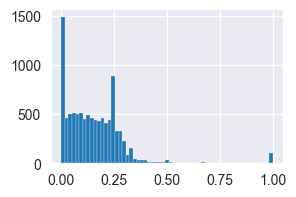

In [43]:
hist(data, field_name='literacy', bins='auto')

Distribution of wealth

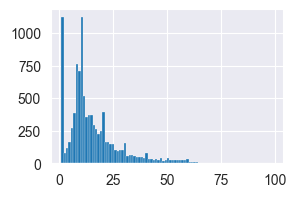

In [44]:
hist(data, field_name='wealth', bins='auto')

Apparently, there are a lot of pops of wealth 1 and literacy 0, dropping them, as they seem to be a game error

In [45]:
def cleanup(pd_data):
    return pd_data[~((pd_data['literacy'] == 0.0) & (pd_data['wealth'] == 1.0))]

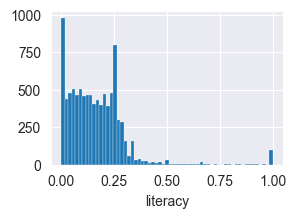

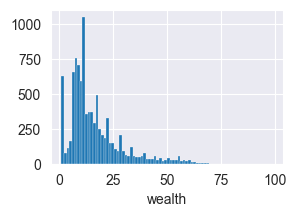

In [46]:
data = cleanup(data)
hist(data, field_name='literacy', bins='auto', x_label='literacy')
hist(data, field_name='wealth', bins='auto', x_label='wealth')

Distribution of loyalty

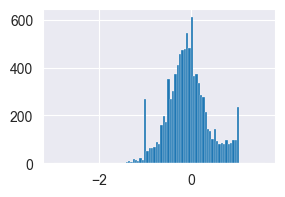

In [47]:
hist(data, field_name='loyalists_and_radicals', bins='auto')

Distribution of years (apparently there are more pops further into the game [not in population size but unique parameters] so the pop is more likely to be from a later year

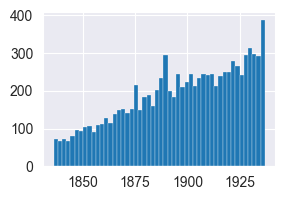

In [48]:
hist(data, field_name='year')

distribution of job satisfaction

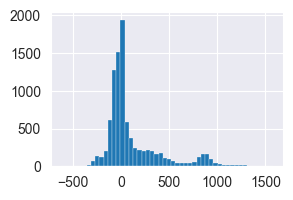

In [49]:
hist(data, field_name='job_satisfaction')

distribution of discrimination

In [50]:
def discrimination_distribution(pd_data):
    value_counts = pd_data['is_discriminated'].value_counts()
    plt.figure(figsize=(3, 2))
    value_counts.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Distribution of discrimination')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['1', '0'], rotation=0)
    plt.grid(axis='y')    

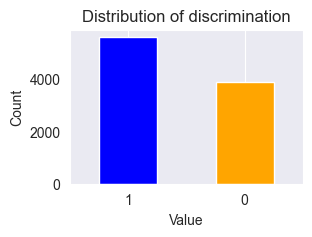

In [51]:
discrimination_distribution(data)

Correlation of variables

In [52]:
map_professions = {
    '"clerks"':1,
    '"laborers"': 2,
    '"machinists"': 3,
    '"peasants"': 4,
    '"soldiers': 5,
    '"slaves"': 6,
    
    '"academics"': 7,
    '"bureaucrats"': 8,
    '"cleargymen"': 9,
    '"engineers"': 10,
    '"farmers"': 11,
    '"officers"': 12,
    '"shopkeepers"': 13,
    
    '"aristocrats"': 14,
    '"capitalists"': 15
}

In [53]:
def data_correlation(pd_data):
    corr_data = pd_data.copy()

    corr_data['profession'] = corr_data['profession'].map(map_professions)

    corr = corr_data.corr()

    plt.figure(figsize=(8, 6))
    plt.yticks(rotation=45)
    sns.heatmap(corr, annot=True)
    plt.show()

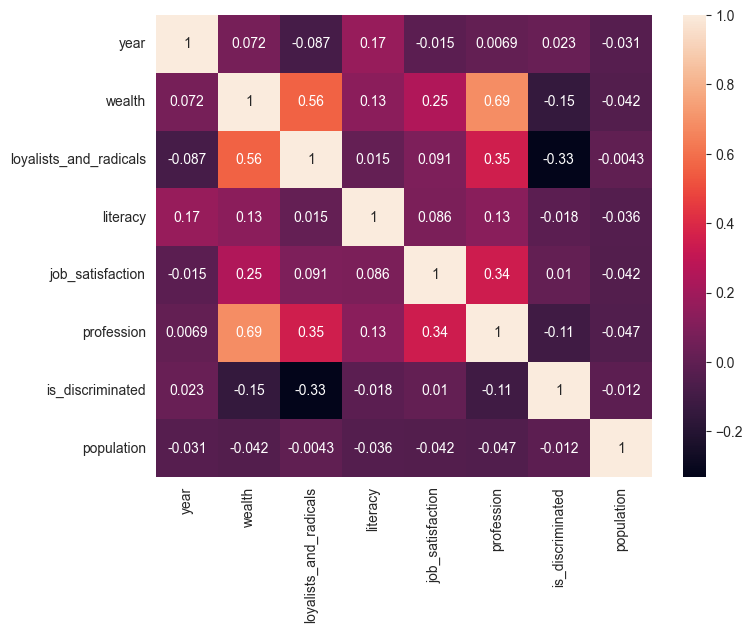

In [54]:
data_correlation(data)

It can be seen that profession has little to do with the year and the population of the pop, so we are dropping those entirely

In [55]:
def drop_redundant(pd_data):
    pd_data = pd_data.drop('year', axis=1)
    pd_data = pd_data.drop('population', axis=1)
    return pd_data

In [56]:
data = drop_redundant(data)

In [57]:
def prepare_data(pd_data: pd.DataFrame):
    x = pd_data.drop('profession', axis=1)
    y = pd_data['profession']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    
    sc = StandardScaler()
    sc.fit(x_train)
    return sc.transform(x_train), y_train, sc.transform(x_test), y_test

In [58]:
def latex_report(report):
    return report.replace('\n\n', '\\\\ \\hline\n').replace('\n', ' & ').replace('      ', ' ').replace('  ', ' ').replace('  ', ' ').replace('  ', ' ').replace(' & ', ' & \\\\ \\hline\n')

def latex_confusion_matrix(cm, y_test):
    latex_conf_matrix = '\\begin{tabular}{l|' + ''.join(['c' for _ in range(len(cm) + 1)]) + '}\n'
    latex_conf_matrix += ' & ' + ' & '.join([str(label) for label in np.unique(y_test)]) + ' \\\\ \\hline\n'
    for i, row in enumerate(cm):
        latex_conf_matrix += str(np.unique(y_test)[i]) + ' & ' + ' & '.join([str(value) for value in row]) + ' \\\\\n'
    latex_conf_matrix += '\\end{tabular}'
    return latex_conf_matrix

In [59]:
def model_test(y_real, y_predicted):
    report = classification_report(y_real, y_predicted, zero_division=0.0)
    cm = confusion_matrix(y_real, y_predicted)
    print("Classification Report:")
    print(report)
    print(cm)
    

In [60]:
def classification(model, pd_data):
    x_train, y_train, x_test, y_test = prepare_data(pd_data)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    model_test(y_test, y_pred)

In [61]:
classification(RandomForestClassifier(), data)

Classification Report:
               precision    recall  f1-score   support

  "academics"       1.00      0.12      0.22        16
"aristocrats"       0.48      0.47      0.47       135
"bureaucrats"       0.27      0.14      0.18        43
"capitalists"       0.56      0.62      0.58       143
  "clergymen"       0.46      0.49      0.48       174
     "clerks"       0.26      0.18      0.21       118
  "engineers"       0.29      0.38      0.33       122
    "farmers"       0.41      0.28      0.34       144
   "laborers"       0.56      0.78      0.66       445
 "machinists"       0.33      0.37      0.35       202
   "officers"       0.32      0.19      0.24        32
   "peasants"       0.36      0.12      0.18        75
"shopkeepers"       0.27      0.13      0.18        83
     "slaves"       0.95      0.95      0.95       122
   "soldiers"       0.14      0.04      0.07        46

     accuracy                           0.48      1900
    macro avg       0.44      0.35      

In [62]:
classification(DecisionTreeClassifier(), data)

Classification Report:
               precision    recall  f1-score   support

  "academics"       0.07      0.06      0.06        16
"aristocrats"       0.38      0.32      0.35       135
"bureaucrats"       0.23      0.28      0.25        43
"capitalists"       0.48      0.52      0.50       143
  "clergymen"       0.35      0.32      0.33       174
     "clerks"       0.14      0.14      0.14       118
  "engineers"       0.24      0.25      0.25       122
    "farmers"       0.29      0.31      0.30       144
   "laborers"       0.55      0.54      0.55       445
 "machinists"       0.23      0.24      0.24       202
   "officers"       0.09      0.09      0.09        32
   "peasants"       0.24      0.24      0.24        75
"shopkeepers"       0.26      0.25      0.26        83
     "slaves"       0.96      0.97      0.96       122
   "soldiers"       0.10      0.11      0.11        46

     accuracy                           0.39      1900
    macro avg       0.31      0.31      

In [63]:
classification(SVC(),data)

Classification Report:
               precision    recall  f1-score   support

  "academics"       0.00      0.00      0.00        16
"aristocrats"       0.50      0.46      0.48       135
"bureaucrats"       0.00      0.00      0.00        43
"capitalists"       0.62      0.66      0.64       143
  "clergymen"       0.49      0.45      0.47       174
     "clerks"       0.29      0.02      0.03       118
  "engineers"       0.31      0.55      0.40       122
    "farmers"       0.43      0.34      0.38       144
   "laborers"       0.47      0.87      0.61       445
 "machinists"       0.31      0.28      0.29       202
   "officers"       0.00      0.00      0.00        32
   "peasants"       0.00      0.00      0.00        75
"shopkeepers"       0.55      0.13      0.21        83
     "slaves"       0.64      0.55      0.59       122
   "soldiers"       0.00      0.00      0.00        46

     accuracy                           0.46      1900
    macro avg       0.31      0.29      

In [32]:
def test_classifiers(pd_data):
    print('Printing results for the random forest classifier')
    classification(RandomForestClassifier(), pd_data)
    print('Printing results for the decision tree classifier')
    classification(DecisionTreeClassifier(), pd_data)
    print('Printing results for the SVC')
    classification(SVC(),pd_data)

let's consider a bigger data pool

In [64]:
data2 = pd.read_csv('cut_campaign1.csv_100000.csv')
data2 = cleanup(data2)
data2 = population(data2)
data2 = per_capita(data2)
test_classifiers(data2)

Printing results for the random forest classifier
Classification Report:
               precision    recall  f1-score   support

  "academics"       0.15      0.01      0.03       137
"aristocrats"       0.53      0.53      0.53      1168
"bureaucrats"       0.42      0.25      0.31       433
"capitalists"       0.72      0.69      0.70      1385
  "clergymen"       0.56      0.61      0.58      1682
     "clerks"       0.41      0.24      0.30      1133
  "engineers"       0.48      0.59      0.53      1424
    "farmers"       0.56      0.50      0.53      1396
   "laborers"       0.62      0.82      0.71      4403
 "machinists"       0.43      0.47      0.45      2340
   "officers"       0.39      0.33      0.36       311
   "peasants"       0.68      0.36      0.47       768
"shopkeepers"       0.50      0.25      0.33       854
     "slaves"       0.95      0.98      0.96      1101
   "soldiers"       0.41      0.11      0.18       496

     accuracy                           0.58 

In [65]:
data3 = pd.read_csv('cut_campaign1.csv_1000000.csv')
data3 = cleanup(data3)
data3 = population(data3)
data3 = per_capita(data3)
classification(RandomForestClassifier(), data3)
classification(DecisionTreeClassifier(), data3)

Classification Report:
               precision    recall  f1-score   support

  "academics"       0.52      0.09      0.15      1515
"aristocrats"       0.60      0.60      0.60     12293
"bureaucrats"       0.55      0.38      0.45      4561
"capitalists"       0.72      0.73      0.72     14394
  "clergymen"       0.59      0.62      0.60     16766
     "clerks"       0.49      0.32      0.38     11120
  "engineers"       0.50      0.64      0.56     14335
    "farmers"       0.60      0.55      0.58     13716
   "laborers"       0.67      0.83      0.74     43917
 "machinists"       0.49      0.54      0.51     22677
   "officers"       0.47      0.37      0.41      3216
   "peasants"       0.73      0.43      0.54      7609
"shopkeepers"       0.58      0.32      0.41      8575
     "slaves"       0.96      0.98      0.97     10715
   "soldiers"       0.56      0.21      0.30      4856

     accuracy                           0.62    190265
    macro avg       0.60      0.51      